In [ ]:
dataset_folder = "./speech_commands_v0.02"

In [ ]:
import librosa
import numpy as np
import pandas as pd


def load_audio(file_path, sr=16000, duration=None):
    """Load audio file and convert to time series"""
    audio, sample_rate = librosa.load(file_path, sr=sr, duration=duration)
    return audio, sample_rate

In [9]:
def extract_mfcc(file_path, sr=16000, n_mfcc=16, n_mels=32, n_fft=512, hop_length=512):
    """Estrae gli MFCC da un file audio usando librosa"""
    # Carica il file audio
    audio, sample_rate = librosa.load(file_path, sr=sr)

    # Estrae gli MFCC
    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sample_rate,
        n_mfcc=n_mfcc,
        n_mels=n_mels,
        n_fft=n_fft,
        hop_length=hop_length
    )

    return mfcc

def extract_mfcc_from_audio(audio, sample_rate=16000, n_mfcc=13, n_mels=32, n_fft=512, hop_length=256):

    # Estrae gli MFCC
    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sample_rate,
        n_mfcc=n_mfcc,
        n_mels=n_mels,
        n_fft=n_fft,
        hop_length=hop_length
    )

    return mfcc

In [ ]:
import os

sr = 16000

keywords = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

data = []

for keyword in keywords:
        print(f'Processing keyword: {keyword}')
        folder_path = f'{dataset_folder}//{keyword}'
        files = [f for f in os.listdir(folder_path)
         if os.path.isfile(os.path.join(folder_path, f))]

        for file in files:
            file_path = os.path.join(folder_path, file)
            file = f"{keyword}/{file}"
            if file.endswith('.wav'):
                audio, sample_rate = load_audio(file_path, sr=sr)
                data.append({
                    'keyword': keyword,
                    'file' : file,
                    'audio': audio
                })

# Convert to DataFrame
data = pd.DataFrame(data)

Processing keyword: yes
Processing keyword: no
Processing keyword: up
Processing keyword: down
Processing keyword: left
Processing keyword: right
Processing keyword: on
Processing keyword: off
Processing keyword: stop
Processing keyword: go


In [6]:
# Extract audio data from the list
audio_data = data['audio']

# Calculate statistics
audio_lengths = [len(audio) for audio in audio_data]
audio_means = [np.mean(audio) for audio in audio_data]
audio_stds = [np.std(audio) for audio in audio_data]
audio_mins = [np.min(audio) for audio in audio_data]
audio_maxs = [np.max(audio) for audio in audio_data]

# Overall statistics
stats = {
    'total_samples': len(audio_data),
    'length_stats': {
        'mean': np.mean(audio_lengths),
        'std': np.std(audio_lengths),
        'min': np.min(audio_lengths),
        'max': np.max(audio_lengths),
        'median': np.median(audio_lengths)
    },
    'amplitude_stats': {
        'mean_of_means': np.mean(audio_means),
        'mean_of_stds': np.mean(audio_stds),
        'global_min': np.min(audio_mins),
        'global_max': np.max(audio_maxs)
    }
}

print("Audio Statistics:")
print(f"Total audio samples: {stats['total_samples']}")
print(f"\nLength Statistics:")
print(f"  Mean length: {stats['length_stats']['mean']:.2f} samples")
print(f"  Std length: {stats['length_stats']['std']:.2f} samples")
print(f"  Min length: {stats['length_stats']['min']} samples")
print(f"  Max length: {stats['length_stats']['max']} samples")
print(f"  Median length: {stats['length_stats']['median']:.2f} samples")
print(f"\nAmplitude Statistics:")
print(f"  Mean of means: {stats['amplitude_stats']['mean_of_means']:.6f}")
print(f"  Mean of stds: {stats['amplitude_stats']['mean_of_stds']:.6f}")
print(f"  Global min: {stats['amplitude_stats']['global_min']:.6f}")
print(f"  Global max: {stats['amplitude_stats']['global_max']:.6f}")

Audio Statistics:
Total audio samples: 38546

Length Statistics:
  Mean length: 15713.30 samples
  Std length: 1107.25 samples
  Min length: 4778 samples
  Max length: 16000 samples
  Median length: 16000.00 samples

Amplitude Statistics:
  Mean of means: -0.000003
  Mean of stds: 0.069429
  Global min: -1.000000
  Global max: 0.999969


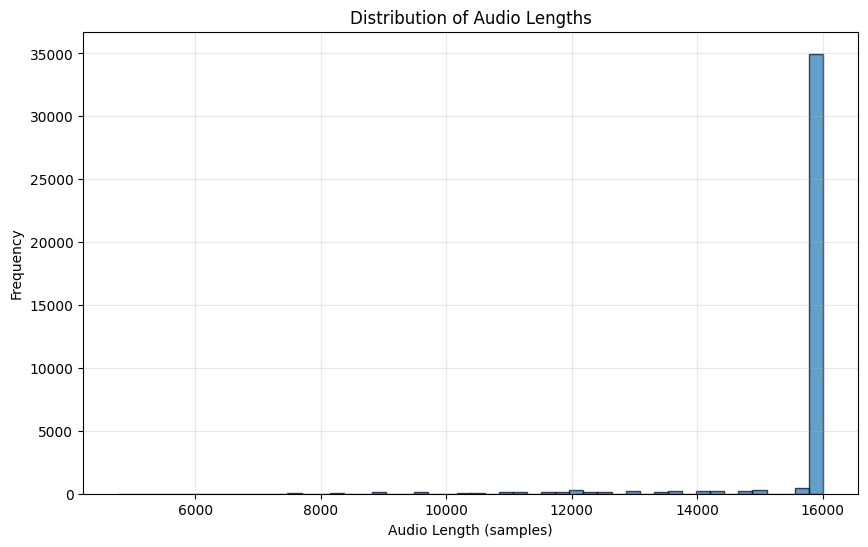

Unique lengths: 110
Most common length: 16000 samples


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(audio_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Audio Lengths')
plt.xlabel('Audio Length (samples)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Show some statistics
print(f"Unique lengths: {len(set(audio_lengths))}")
print(f"Most common length: {max(set(audio_lengths), key=audio_lengths.count)} samples")

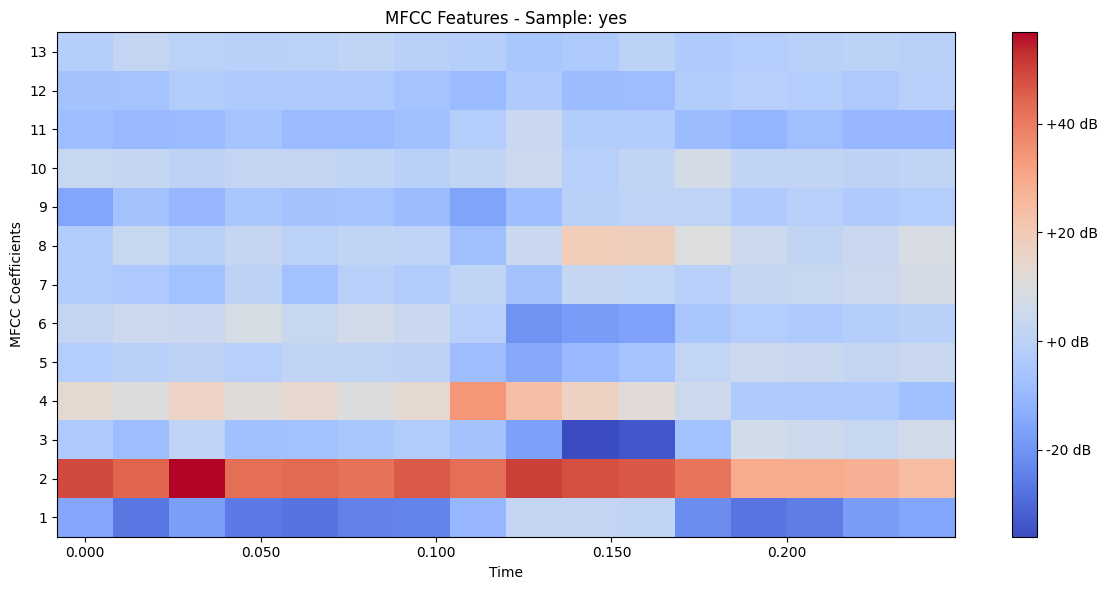

MFCC shape: (13, 16)
Sample keyword: yes


In [ ]:
# Select a sample audio file from the data
random_index = np.random.randint(0, len(data))
sample_audio = data['audio'].iloc[random_index]
sample_keyword = data['keyword'].iloc[random_index]

# Extract MFCC features
mfcc_features = extract_mfcc_from_audio(sample_audio, sample_rate=sr, n_mfcc=13, n_mels=32, n_fft=2048, hop_length=1024)

# Plot the MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, hop_length=256)
plt.colorbar(format='%+2.0f dB')
plt.title(f'MFCC Features - Sample: {sample_keyword}')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(mfcc_features.shape[0]), [f'{i+1}' for i in range(mfcc_features.shape[0])])
plt.tight_layout()
plt.show()

print(f"MFCC shape: {mfcc_features.shape}")
print(f"Sample keyword: {sample_keyword}")

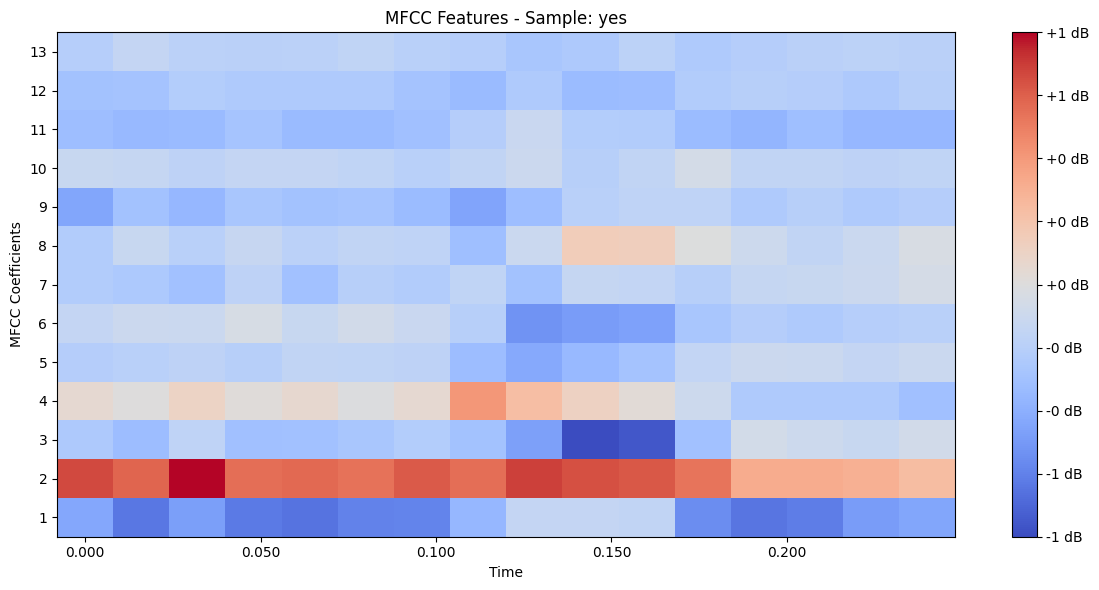

Original MFCC range: [-36.01, 56.83]
Normalized MFCC range: [-1.00, 1.00]
Normalized MFCC shape: (13, 16)


In [17]:
# Normalize MFCC features to the range [-1, 1]
mfcc_min = np.min(mfcc_features)
mfcc_max = np.max(mfcc_features)
mfcc_features_normalized = 2 * (mfcc_features - mfcc_min) / (mfcc_max - mfcc_min) - 1

# Plot the MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc_features_normalized, x_axis='time', sr=sr, hop_length=256)
plt.colorbar(format='%+2.0f dB')
plt.title(f'MFCC Features - Sample: {sample_keyword}')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(mfcc_features.shape[0]), [f'{i+1}' for i in range(mfcc_features.shape[0])])
plt.tight_layout()
plt.show()


print(f"Original MFCC range: [{mfcc_min:.2f}, {mfcc_max:.2f}]")
print(f"Normalized MFCC range: [{np.min(mfcc_features_normalized):.2f}, {np.max(mfcc_features_normalized):.2f}]")
print(f"Normalized MFCC shape: {mfcc_features_normalized.shape}")


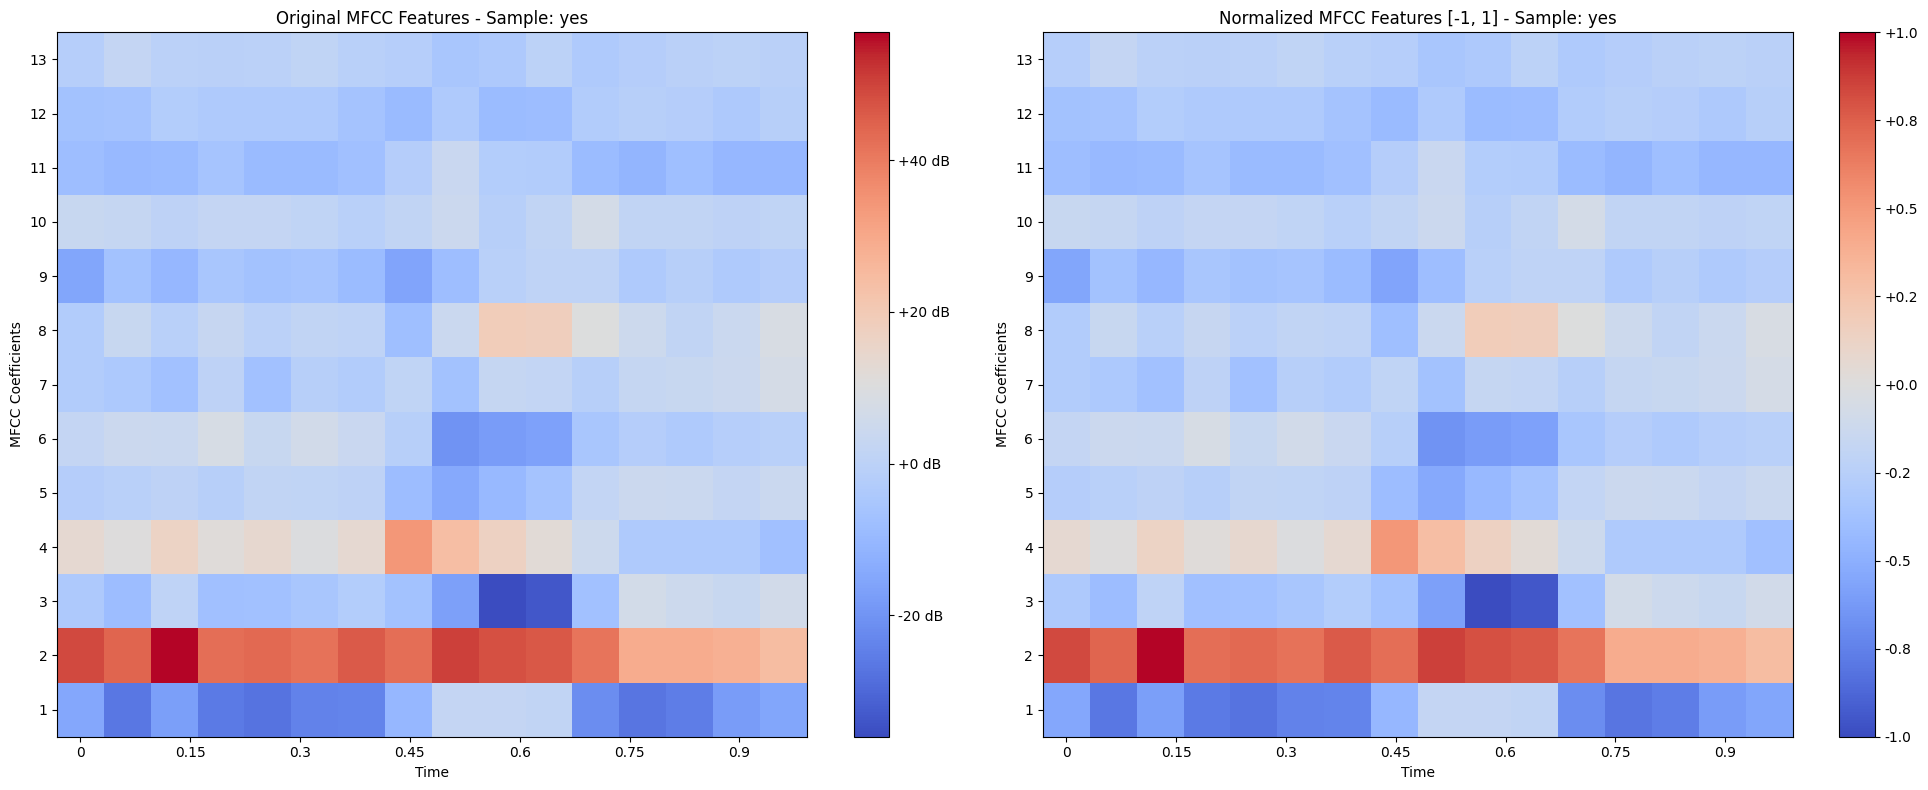

Original MFCC range: [-36.01, 56.83]
Normalized MFCC range: [-1.00, 1.00]
MFCC shape: (13, 16)


In [18]:
# Plot both MFCC features side by side
plt.figure(figsize=(20, 8))

# Original MFCC
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, hop_length=1024)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Original MFCC Features - Sample: {sample_keyword}')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(mfcc_features.shape[0]), [f'{i+1}' for i in range(mfcc_features.shape[0])])

# Normalized MFCC
plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc_features_normalized, x_axis='time', sr=sr, hop_length=1024)
plt.colorbar(format='%+2.1f')
plt.title(f'Normalized MFCC Features [-1, 1] - Sample: {sample_keyword}')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(mfcc_features_normalized.shape[0]), [f'{i+1}' for i in range(mfcc_features_normalized.shape[0])])

plt.tight_layout()
plt.show()

# Print comparison statistics
print(f"Original MFCC range: [{mfcc_min:.2f}, {mfcc_max:.2f}]")
print(f"Normalized MFCC range: [{np.min(mfcc_features_normalized):.2f}, {np.max(mfcc_features_normalized):.2f}]")
print(f"MFCC shape: {mfcc_features.shape}")